In [ ]:
!pip install cdflib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 1.4 MB/s 


## Data Prep

In [ ]:
import os
directory = "Data"
parent_dir = "/content/"
path = os.path.join(parent_dir, directory)
os.mkdir(path)

In [ ]:
import numpy
import scipy
import matplotlib
import h5py
import networkx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import cdflib
import xarray as xr
import urllib.request
import math 

x=0
daty= datetime.datetime(2019, 1, 1)
for i in range (0,365):
  dateT = daty.strftime('%Y%m%d')
  
  try :
   fname = '/content/Data/dscovr_h1_fc_'+dateT+'_v12.cdf'
   url = ("https://cdaweb.gsfc.nasa.gov/pub/data/dscovr/h1/faraday_cup/"+daty.strftime('%Y')+"/dscovr_h1_fc_"+dateT+"_v12.cdf")
   #print("a")
   urllib.request.urlretrieve(url, fname)
   x=x+1
  except:
   try:
     fname = '/content/Data/dscovr_h1_fc_'+dateT+'_v13.cdf'
     url = ("https://cdaweb.gsfc.nasa.gov/pub/data/dscovr/h1/faraday_cup/"+daty.strftime('%Y')+"/dscovr_h1_fc_"+dateT+"_v13.cdf")
     #print("b")
     urllib.request.urlretrieve(url, fname)
     x=x+1
   except:
    try:
      fname = '/content/Data/dscovr_h1_fc_'+dateT+'_v14.cdf'
      url = ("https://cdaweb.gsfc.nasa.gov/pub/data/dscovr/h1/faraday_cup/"+daty.strftime('%Y')+"/dscovr_h1_fc_"+dateT+"_v14.cdf")
      #print("c")
      urllib.request.urlretrieve(url, fname)
      x=x+1
    except:
      print(dateT)
      print("no file of this date")


  daty+=datetime.timedelta(days=1)
  #print(dateT)

20190303
no file of this date
20190304
no file of this date
20190306
no file of this date
20190307
no file of this date
20190628
no file of this date
20190629
no file of this date
20190630
no file of this date
20190701
no file of this date
20190702
no file of this date
20190703
no file of this date
20190704
no file of this date
20190705
no file of this date
20190706
no file of this date
20190707
no file of this date
20190708
no file of this date
20190709
no file of this date
20190710
no file of this date
20190711
no file of this date
20190712
no file of this date
20190713
no file of this date
20190714
no file of this date
20190715
no file of this date
20190716
no file of this date
20190717
no file of this date
20190718
no file of this date
20190719
no file of this date
20190720
no file of this date
20190721
no file of this date
20190722
no file of this date
20190723
no file of this date
20190724
no file of this date
20190725
no file of this date
20190726
no file of this date
20190727
n

In [ ]:
dataX=[]
cdfDataList=os.listdir('/content/Data')
for j in range (0,len(cdfDataList)):
  dataX.append(cdflib.cdf_to_xarray("/content/Data/"+cdfDataList[j]))
  

cleaning the data:


In [ ]:
print(dataX[0].Time_PB5.values)

timeDataSeries=[]
yearTimeDataSeries=[]
dayTimeDataSeries=[]
msTimeDataSeries=[]
velocityDataSeries=[]
velocityMagDataSeries=[]
thermalSpeedDataSeries=[]
densityDataSeries=[]
temperatureDataSeries=[]



e=0
print(len(dataX))
for k in range (0,len(dataX)):
    for i in range (0,len(dataX[k].Time_PB5.values)):
      yearTimeDataSeries.append(dataX[k].Time_PB5.values[i][0])
      dayTimeDataSeries.append(dataX[k].Time_PB5.values[i][1])
      msTimeDataSeries.append(dataX[k].Time_PB5.values[i][2])
      velocityDataSeries.append(dataX[k].V_GSE.values[i])
      thermalSpeedDataSeries.append(dataX[k].THERMAL_SPD.values[i])
      densityDataSeries.append(dataX[k].Np.values[i])
      temperatureDataSeries.append(dataX[k].THERMAL_TEMP.values[i])
      x=(dataX[k].V_GSE.values[i][0]*dataX[k].V_GSE.values[i][0])+(dataX[k].V_GSE.values[i][1]*dataX[k].V_GSE.values[i][1])+(dataX[k].V_GSE.values[i][2]*dataX[k].V_GSE.values[i][2])
      velocityMagDataSeries.append(math.sqrt(x))
      e=e+1




print(e)
print("Total minutes for 2019's data")
print(len(timeDataSeries))
cc=timeDataSeries.copy()



[[    2019      151        0]
 [    2019      151    60645]
 [    2019      151   119971]
 ...
 [    2019      151 86219385]
 [    2019      151 86280029]
 [    2019      151 86339355]]
174


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in float_scalars


249120
Total minutes for 2019's data
0


In [ ]:

features={'year':yearTimeDataSeries,'day':dayTimeDataSeries,'ms':msTimeDataSeries,'velocity':velocityDataSeries,'thermal_speed':thermalSpeedDataSeries,'density':densityDataSeries,'temperature':temperatureDataSeries,'velocityMag':velocityMagDataSeries}

featuresDf=pd.DataFrame(features)

orderedFeaturesDf=featuresDf.sort_values(by=["year","day","ms"])

featuresDf.dtypes
featuresDf.describe()

orderedFeaturesDf=orderedFeaturesDf.assign(time = ''+orderedFeaturesDf.year.astype(str) + orderedFeaturesDf.day.astype(str) + orderedFeaturesDf.ms.astype(str))

#missing or / -1e+31 management:
orderedFeaturesDf=orderedFeaturesDf[orderedFeaturesDf.density > -1^31]

orderedFeaturesDf=orderedFeaturesDf.drop(columns=['year','day','ms','velocity'])
orderedFeaturesDf=orderedFeaturesDf.set_index('time')
orderedFeaturesDf.head(1200)



,thermal_speed,density,temperature,velocityMag
time,,,,
2019120099995,29.481003,4.476263,52646.445312,439.451754
2019120160001,30.210070,4.586602,55282.539062,438.363558
2019120219997,30.314930,4.598308,55666.980469,439.034683
2019120280003,30.158314,4.581158,55093.277344,438.071680
2019120339999,30.190407,4.597085,55210.601562,438.708723
...,...,...,...,...
2019263000007,15.302029,3.953820,14183.472656,353.158195
2019263060013,15.997763,4.074534,15502.545898,353.717070
2019263119998,15.526944,3.920435,14603.485352,352.961544


In [ ]:
print(len(orderedFeaturesDf))
#15122 missing values(were -1^31) from 249120 to 233998

233998


plotting data

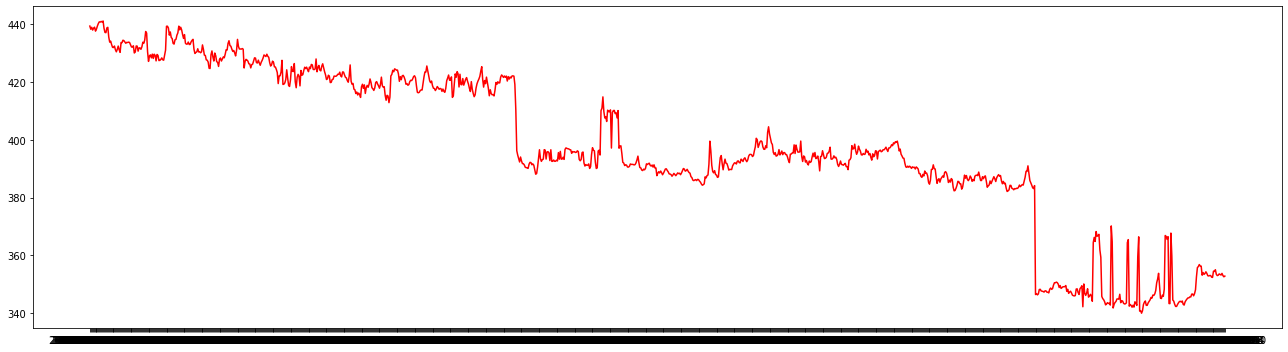

In [ ]:
plt.rcParams["figure.figsize"] = [18, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(orderedFeaturesDf.iloc[00:1200,3] , color="red")
plt.show()

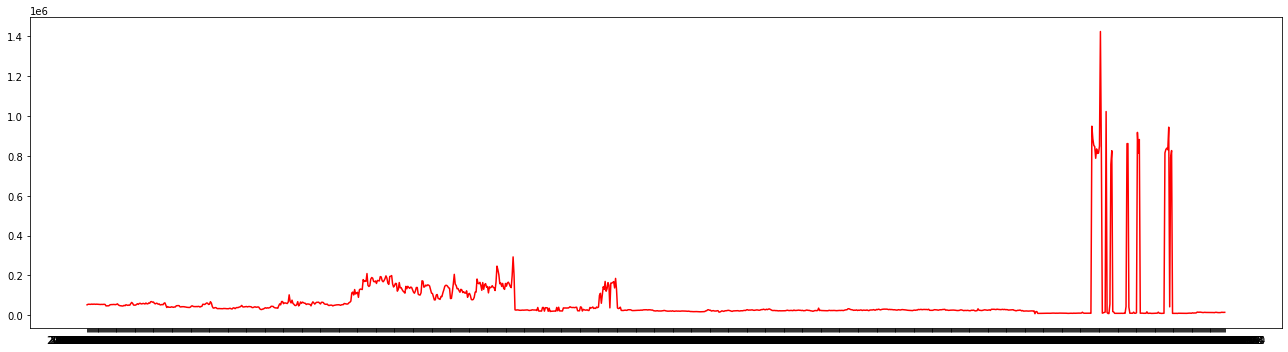

In [ ]:
plt.rcParams["figure.figsize"] = [18, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(orderedFeaturesDf.iloc[0:1200,2] , color="red")
plt.show()

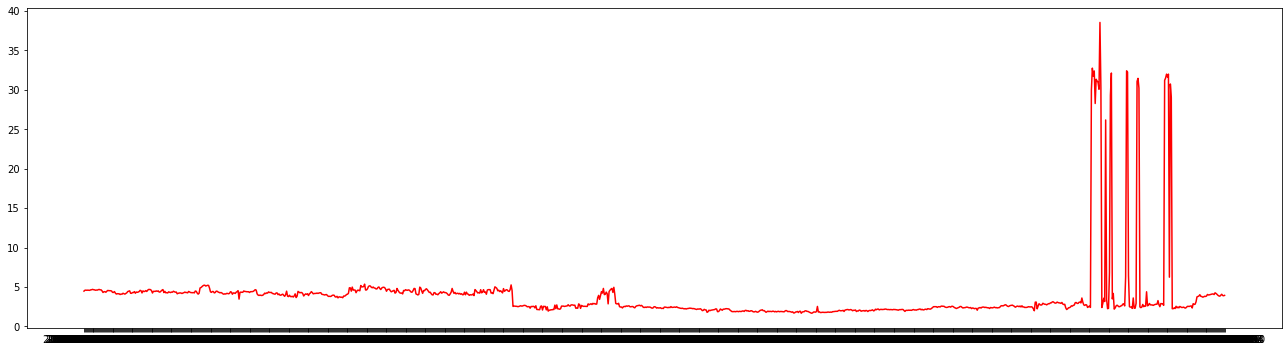

In [ ]:
plt.rcParams["figure.figsize"] = [18, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(orderedFeaturesDf.iloc[0:1200,1] , color="red")
plt.show()

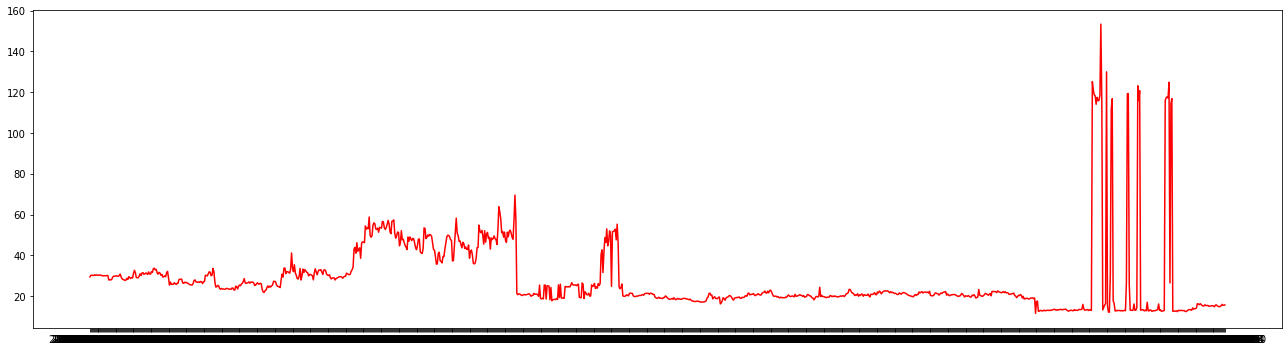

In [ ]:
plt.rcParams["figure.figsize"] = [18, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(orderedFeaturesDf.iloc[0:1200,0] , color="red")
plt.show()

# Model 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


233998 minutes/60 = 3899 hours and 58 minutes

we will input 158  minutes as input to the model 
233998/158=1481
85% training :approx 1481*85/100=1258.85=>1106=158*7
15% training :approx 1481*15/100=>1481-1106=>316

1106+316=1422
1481-1422=59 batch of 158min unsused data ?? (to see for later)
to recalculate later
now ordinary 85% 15% splitting


In [ ]:
#85% of 233998=198898.3=>198899
#15% of 233998=35099.7=>35099
train_df,test_df = orderedFeaturesDf[0:198899], orderedFeaturesDf[198899:] 

In [ ]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
def split_series(series, n_past, n_future):

  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)


n_past = 158
n_future = 79
n_features = 4

X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [ ]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

model_e1d1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 158, 4)]     0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 100),        42000       ['input_1[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 repeat_vector (RepeatVector)   (None, 79, 100)      0           ['lstm[0][0]']                   
                                                                                              

In [ ]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
model_e2d2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 158, 4)]     0           []                               
                                                                                                  
 lstm_2 (LSTM)                  [(None, 158, 100),   42000       ['input_2[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 lstm_3 (LSTM)                  [(None, 100),        80400       ['lstm_2[0][0]']                 
                                 (None, 100),                                               

In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

In [ ]:
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

In [ ]:
#save the model
model_e2d2.save('/content/drive/MyDrive/e2d2model')
model_e1d1.save('/content/drive/MyDrive/e1d1model')

In [ ]:
pred_e1d1=model_e1d1.predict(X_test)
pred_e2d2=model_e2d2.predict(X_test)

In [ ]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [ ]:
y_test.shape


(34863, 79, 4)

In [ ]:
#print series prediction

In [ ]:
from sklearn.metrics import mean_absolute_error
 
for index,i in enumerate(train_df.columns):
  print(i)
  for j in range(1,6):
    print("Day ",j,":")
    print("MAE-E1D1 : ",mean_absolute_error(y_test[:,j-1,index],pred_e1d1[:,j-1,index]),end=", ")
    print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred_e2d2[:,j-1,index]))
  print()
  print()
  

thermal_speed
Day  1 :
MAE-E1D1 :  1305509455.9496214, MAE-E2D2 :  1305509471.0614326
Day  2 :
MAE-E1D1 :  1305525656.3320866, MAE-E2D2 :  1305525676.0620794
Day  3 :
MAE-E1D1 :  1305539388.939911, MAE-E2D2 :  1305539407.4972663
Day  4 :
MAE-E1D1 :  1305553748.2663317, MAE-E2D2 :  1305553742.121292
Day  5 :
MAE-E1D1 :  1305567859.069819, MAE-E2D2 :  1305567839.3537216


density
Day  1 :
MAE-E1D1 :  1.4782112460330083e+21, MAE-E2D2 :  1.4782112460330083e+21
Day  2 :
MAE-E1D1 :  1.4782112456140335e+21, MAE-E2D2 :  1.4782112456140338e+21
Day  3 :
MAE-E1D1 :  1.478211245162521e+21, MAE-E2D2 :  1.478211245162521e+21
Day  4 :
MAE-E1D1 :  1.478211244793289e+21, MAE-E2D2 :  1.478211244793289e+21
Day  5 :
MAE-E1D1 :  1.4782112444010025e+21, MAE-E2D2 :  1.4782112444010025e+21


temperature
Day  1 :
MAE-E1D1 :  4.872343146953056e+28, MAE-E2D2 :  4.872343146953056e+28
Day  2 :
MAE-E1D1 :  4.872391466733303e+28, MAE-E2D2 :  4.872391466733303e+28
Day  3 :
MAE-E1D1 :  4.872430739193664e+28, MAE-E2D2 

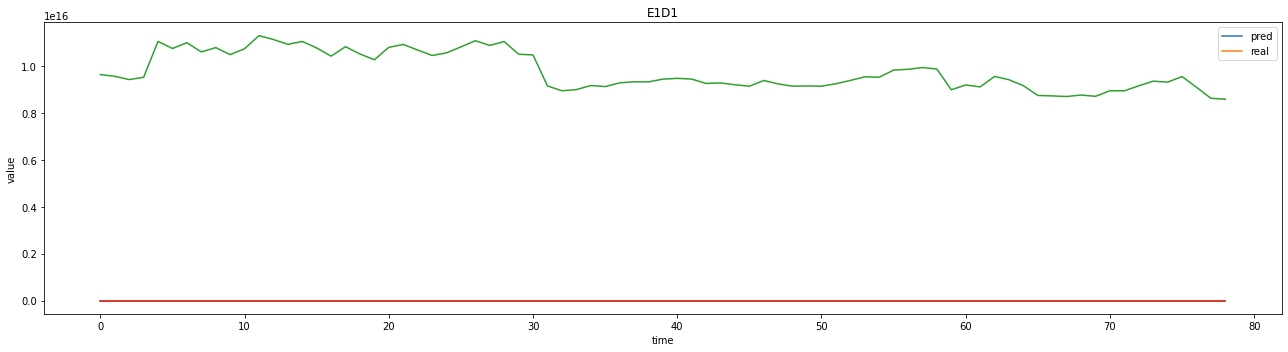

60870921.271426514
137673.45


In [ ]:

#plt.plot(y_test[12][0:79][3])
plt.plot(y_test[0:100][1])
#plt.plot(pred_e1d1[0:100][0:79][3])
plt.title("E1D1")
plt.xlabel('time')
plt.ylabel('value')
plt.legend(['pred', 'real'])
plt.show()

print(y_test[12][0][3])
print(pred_e1d1[12][0][3])

In [ ]:
X_test.shape

(34863, 158, 4)

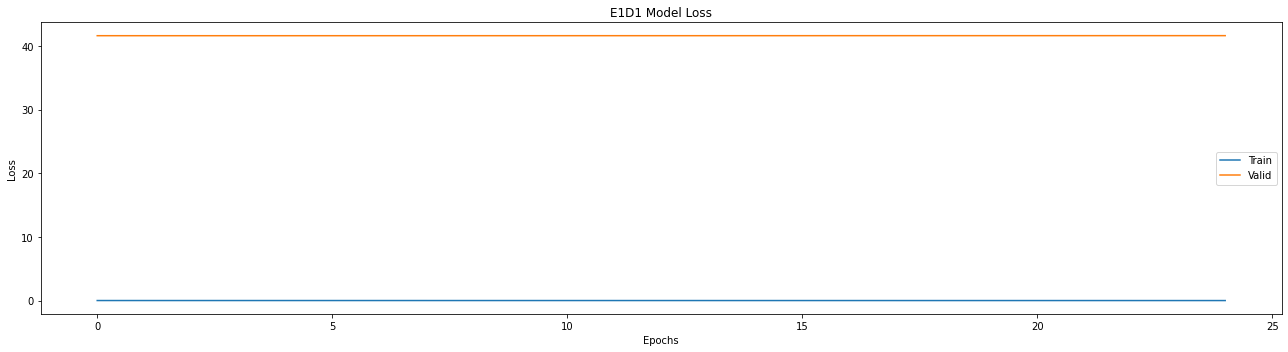

In [ ]:
plt.plot(history_e1d1.history['loss'])
plt.plot(history_e1d1.history['val_loss'])
plt.title("E1D1 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

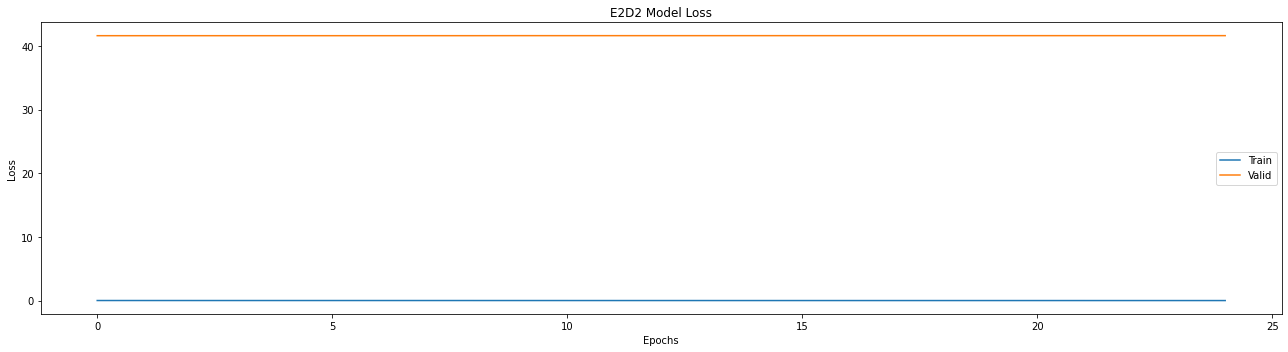

In [ ]:
plt.plot(history_e2d2.history['loss'])
plt.plot(history_e2d2.history['val_loss'])
plt.title("E2D2 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()